# Decission Tree Regressor

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text
from matplotlib import pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import seaborn as sns
from sklearn.pipeline import make_pipeline

In [2]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"

NUMBER_SEED = 1

In [3]:
df = pd.read_csv(data)

In [4]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


In [6]:
# check for missing values
df.isna().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [7]:
# fill na with median
df['num_cylinders'] = df['num_cylinders'].fillna(df['num_cylinders'].median())
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())
df['acceleration'] = df['acceleration'].fillna(df['acceleration'].median())
df['num_doors'] = df['num_doors'].fillna(df['num_doors'].median())

In [8]:
# split data into train, val and test 60%, 20%, 20%

# test size 20%
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=NUMBER_SEED)

# val 25% of the remaining 80% = 20%
# train is remaining 60%
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=NUMBER_SEED)

In [9]:
# reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [10]:
# separate target value and remove it from dataframes
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [11]:
# vectorize dataframes
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

In [12]:
# visualize a decision tree with max_depth=1

dt = DecisionTreeRegressor(max_depth=1, random_state=NUMBER_SEED)
dt.fit(X_train, y_train)

print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



In [13]:

def train_dt(xt, yt, max_depth, print_tree=False, min_sample_leaf=1):
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=NUMBER_SEED, min_samples_leaf=min_sample_leaf)
    dt.fit(xt, yt)

    if print_tree:
        print(export_text(dt, feature_names=list(dv.get_feature_names_out())))
    return dt


In [14]:
# visualize a decision tree with max_depth=2
train_dt(X_train, y_train, 2, print_tree=True)

|--- vehicle_weight <= 3022.11
|   |--- vehicle_weight <= 2505.96
|   |   |--- value: [18.80]
|   |--- vehicle_weight >  2505.96
|   |   |--- value: [16.08]
|--- vehicle_weight >  3022.11
|   |--- vehicle_weight <= 3506.12
|   |   |--- value: [13.76]
|   |--- vehicle_weight >  3506.12
|   |   |--- value: [11.14]



DecisionTreeRegressor(max_depth=2, random_state=1)

In [15]:
# visualize a decision tree with max_depth=3
train_dt(X_train, y_train, 3, print_tree=True)

|--- vehicle_weight <= 3022.11
|   |--- vehicle_weight <= 2505.96
|   |   |--- vehicle_weight <= 2069.91
|   |   |   |--- value: [20.77]
|   |   |--- vehicle_weight >  2069.91
|   |   |   |--- value: [18.37]
|   |--- vehicle_weight >  2505.96
|   |   |--- vehicle_weight <= 2750.89
|   |   |   |--- value: [16.83]
|   |   |--- vehicle_weight >  2750.89
|   |   |   |--- value: [15.56]
|--- vehicle_weight >  3022.11
|   |--- vehicle_weight <= 3506.12
|   |   |--- vehicle_weight <= 3268.69
|   |   |   |--- value: [14.26]
|   |   |--- vehicle_weight >  3268.69
|   |   |   |--- value: [13.12]
|   |--- vehicle_weight >  3506.12
|   |   |--- vehicle_weight <= 3848.64
|   |   |   |--- value: [11.71]
|   |   |--- vehicle_weight >  3848.64
|   |   |   |--- value: [9.67]



DecisionTreeRegressor(max_depth=3, random_state=1)

In [16]:
arr_max_depth = [1,2,3,4,5, 6, 7, 8]

metric_results = []

for max_depth in arr_max_depth:
    dt = train_dt(X_train, y_train, max_depth)

    y_val_pred = dt.predict(X_val)

    rmse = root_mean_squared_error(y_val, y_val_pred)

    #print('---')
    #print('')

    # Store metrics in dictionary
    metrics = {
        'max_depth': max_depth,
        'rmse': rmse
    }
    metric_results.append(metrics)

    #break


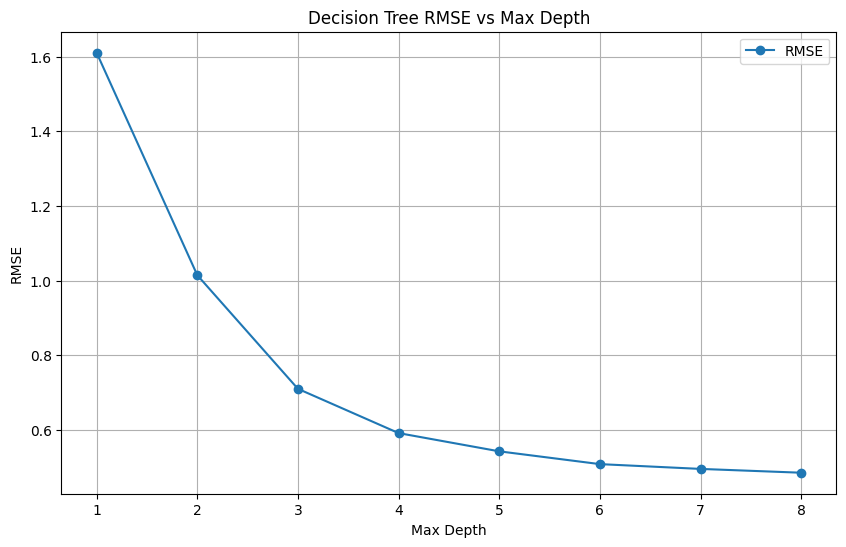

In [17]:
# plot metrics result
df_metrics = pd.DataFrame(metric_results)
plt.figure(figsize=(10, 6))
plt.plot(df_metrics['max_depth'], df_metrics['rmse'], marker='o', label='RMSE')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.title('Decision Tree RMSE vs Max Depth')
plt.legend()
plt.grid()
plt.show()

Try combination parameter max_depth and min_sample_leaf

In [18]:
scores = []

for max_depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = train_dt(X_train, y_train, max_depth, min_sample_leaf=s)
        y_val_pred = dt.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_val_pred)

        scores.append((max_depth, s, rmse))

In [19]:
columns = ['max_depth', 'min_samples_leaf', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

In [20]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['rmse'])
#df_scores_pivot.round(3)

In [21]:
df_scores

,max_depth,min_samples_leaf,rmse
0,4,1,0.591565
1,4,5,0.591565
2,4,10,0.591565
3,4,15,0.591565
4,4,20,0.591565
5,4,500,0.843312
6,4,100,0.606775
7,4,200,0.618677
8,5,1,0.542701
9,5,5,0.542701


In [22]:
df_scores_pivot

rmse                    
max_depth                4         5         6
min_samples_leaf                              
1                 0.591565  0.542701  0.508437
5                 0.591565  0.542701  0.508434
10                0.591565  0.542701  0.508639
15                0.591565  0.542134  0.508333
20                0.591565  0.541908  0.508244
100               0.606775  0.572153  0.555443
200               0.618677  0.597500  0.597500
500               0.843312  0.843312  0.843312

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

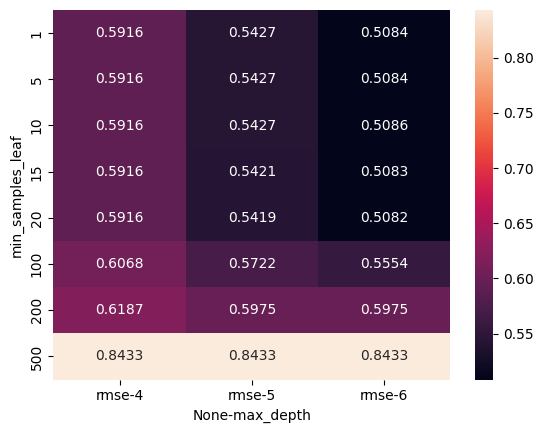

In [23]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".4f")

Base on the heatmap, choose max_depth=6 and min_sample_leaf=20, it give lowest rmse 0.5082

## Cross validation with kfold

In [ ]:
# combine train + val
#X_full_train = np.vstack([X_train, X_val])
y_full_train = np.concatenate([y_train, y_val])

In [25]:
# do cross validation

param_grid = [
    {'max_depth': 4, 'min_samples_leaf': 10},
    {'max_depth': 6, 'min_samples_leaf': 20},
    {'max_depth': 5, 'min_samples_leaf': 20},
]

# Rebuild full-train raw dicts so the DictVectorizer can be fit inside each fold
df_full_train_raw = pd.concat([df_train, df_val], ignore_index=True)
X_full_train_dict = df_full_train_raw.to_dict(orient='records')

result_rmse = []

for p in param_grid:
    #print(p)

    pipe = make_pipeline(
        DictVectorizer(sparse=False),
        DecisionTreeRegressor(max_depth=p['max_depth'], min_samples_leaf=p['min_samples_leaf'], random_state=NUMBER_SEED)
    )

    cv = KFold(n_splits=5, shuffle=True, random_state=NUMBER_SEED)
    rmse = cross_val_score(pipe, X_full_train_dict, y_full_train, cv=cv, scoring='neg_root_mean_squared_error')
    # Convert to positive RMSE values
    rmse = -rmse
    rmse_mean = rmse.mean()
    rmse_std = rmse.std()
    result_rmse.append((p['max_depth'], p['min_samples_leaf'], rmse_mean, rmse_std))




In [26]:
# Print result_rmse in a table format
df_result_rmse = pd.DataFrame(result_rmse, columns=['max_depth', 'min_samples_leaf', 'rmse_mean', 'rmse_std'])
print(df_result_rmse)

   max_depth  min_samples_leaf  rmse_mean  rmse_std
0          4                10   0.601102  0.011524
1          6                20   0.509702  0.007812
2          5                20   0.546122  0.010144


From cross validation result, it confirm that option max_depth=6 and min_samples_leaf=20, have the lowest mean and smallest std.



## Train final model

Train final model with train+val dataset, using parameter max_depth=6 and min_samples_leaf=20.

And do prediction using test dataset.

In [27]:
# Final model using the same pipeline approach
final_pipe = make_pipeline(
    DictVectorizer(sparse=False),
    DecisionTreeRegressor(max_depth=6, min_samples_leaf=20, random_state=NUMBER_SEED)
)

df_full_train_raw = pd.concat([df_train, df_val], ignore_index=True)
X_full_train_dict = df_full_train_raw.to_dict(orient='records')

final_pipe.fit(X_full_train_dict, y_full_train)


Pipeline(steps=[('dictvectorizer', DictVectorizer(sparse=False)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=6, min_samples_leaf=20,
                                       random_state=1))])

In [28]:
# Predict on test
X_test_dict = df_test.to_dict(orient='records')
y_test_pred = final_pipe.predict(X_test_dict)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
print("rmse test", rmse_test)

rmse test 0.5237845504657058


Get top 10 Feature Importance

In [29]:
# Extract feature names and importances from the fitted pipeline
dv_final = final_pipe.named_steps['dictvectorizer']
tree_final = final_pipe.named_steps['decisiontreeregressor']

df_fi = pd.DataFrame({
    'feature': dv_final.get_feature_names_out(),
    'importance': tree_final.feature_importances_
}).sort_values(by='importance', ascending=False)

# Top 10
df_fi.head(10)


,feature,importance
13,vehicle_weight,0.985948
6,horsepower,0.009093
0,acceleration,0.004959
1,drivetrain=All-wheel drive,0.000000
2,drivetrain=Front-wheel drive,0.000000
3,engine_displacement,0.000000
4,fuel_type=Diesel,0.000000
5,fuel_type=Gasoline,0.000000
7,model_year,0.000000
8,num_cylinders,0.000000


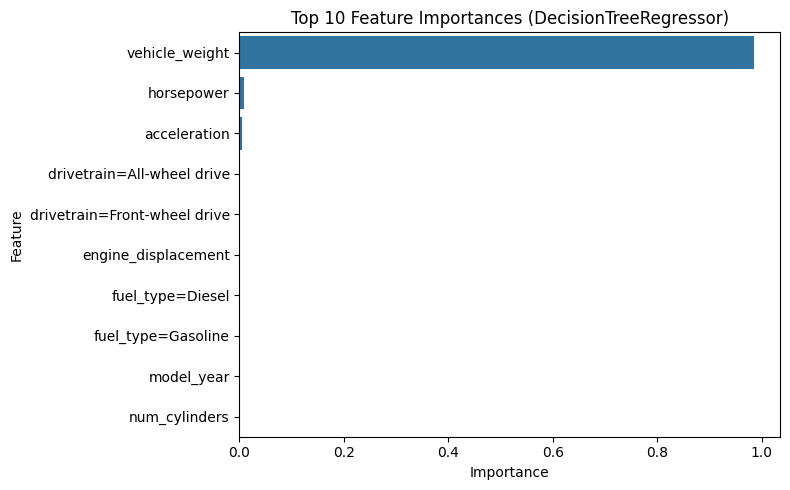

In [30]:
top_n = 10
plt.figure(figsize=(8, 5))
sns.barplot(data=df_fi.head(top_n), x='importance', y='feature', orient='h')
plt.title(f'Top {top_n} Feature Importances (DecisionTreeRegressor)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()